Epoch: 9999, Average error: 0.08073
Epoch: 19999, Average error: 0.03384
Epoch: 29999, Average error: 0.02464
Epoch: 39999, Average error: 0.02025
Epoch: 49999, Average error: 0.01756
Epoch: 59999, Average error: 0.01571
Epoch: 69999, Average error: 0.01433
Epoch: 79999, Average error: 0.01326
Epoch: 89999, Average error: 0.01239
Epoch: 99999, Average error: 0.01167
Epoch: 109999, Average error: 0.01106
Epoch: 119999, Average error: 0.01054
Epoch: 129999, Average error: 0.01008
Epoch: 139999, Average error: 0.00968
Epoch: 149999, Average error: 0.00932
Epoch: 159999, Average error: 0.00900
Epoch: 169999, Average error: 0.00871
Epoch: 179999, Average error: 0.00845
Ostateczne wyjście po treningu: [[0.00844995 0.99202087 0.99027346 0.00762557]]
Wartości oczekiwane: [0 1 1 0]
Błąd po treningu: [[-0.00844997  0.00797916  0.00972657 -0.00762559]]
Średni błąd: 0.00845


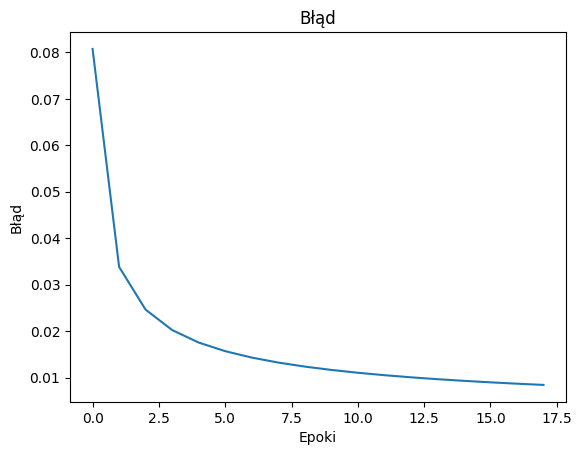

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja wejść oraz oczekiwanego wyjścia (tabela prawdy dla XOR)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # macierz 2x4, każda kolumna to przykład treningowy
d = np.array([0, 1, 1, 0])  # oczekiwane wyjście dla XOR
# d = np.array([0, 0, 0, 1])  # oczekiwane wyjście dla AND

# Parametry sieci
inputSize = 2     # liczba neuronów wejściowych (x1, x2)
hiddenSize = 2    # liczba neuronów w warstwie ukrytej
outputSize = 1    # liczba neuronów w warstwie wyjściowej
lr = 0.1          # współczynnik uczenia
# lr = 0.01
epochs = 180000   # liczba epok treningowych
# epochs = 1000000 

# Losowa inicjalizacja wag i biasów w zakresie [-1, 1] (budowa parametrów sieci)
w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1  # Wagi od warstwy wejściowej do warstwy ukrytej
b1 = np.random.rand(hiddenSize, 1) * 2 - 1            # Bias warstwy ukrytej
w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1   # Wagi od warstwy ukrytej do warstwy wyjściowej
b2 = np.random.rand(outputSize, 1) * 2 - 1            # Bias warstwy wyjściowej

# Trening sieci metodą backpropagation (budowa mechanizmu uczenia)
error_list = []
for epoch in range(epochs):
    # Forward pass (przepływ sygnału do przodu)
    z1 = np.dot(w1, X) + b1             # Suma ważona dla warstwy ukrytej
    a1 = 1 / (1 + np.exp(-z1))          # Aktywacja sigmoid dla warstwy ukrytej

    z2 = np.dot(w2, a1) + b2            # Suma ważona dla warstwy wyjściowej
    a2 = 1 / (1 + np.exp(-z2))          # Aktywacja sigmoid dla warstwy wyjściowej

    # Obliczenie błędu i propagacja wstecz (budowa mechanizmu korekty)
    error = d - a2                    # Różnica między oczekiwanym a faktycznym wyjściem
    da2 = error * (a2 * (1 - a2))       # Pochodna funkcji aktywacji dla warstwy wyjściowej
    dz2 = da2                         # Gradient dla warstwy wyjściowej

    # Propagacja błędu do warstwy ukrytej
    da1 = np.dot(w2.T, dz2)           # Gradient dla warstwy ukrytej
    dz1 = da1 * (a1 * (1 - a1))         # Pochodna funkcji aktywacji dla warstwy ukrytej

    # Aktualizacja wag i biasów (budowa procesu uczenia)
    w2 += lr * np.dot(dz2, a1.T)              # Aktualizacja wag od warstwy ukrytej do wyjściowej
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Aktualizacja biasu warstwy wyjściowej

    w1 += lr * np.dot(dz1, X.T)               # Aktualizacja wag od warstwy wejściowej do ukrytej
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Aktualizacja biasu warstwy ukrytej

    if (epoch+1) % 10000 == 0:
        print("Epoch: %d, Average error: %0.05f" % (epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))

# Testowanie wytrenowanej sieci (budowa etapu testowania)
z1 = np.dot(w1, X) + b1             # Suma ważona dla warstwy ukrytej
a1 = 1 / (1 + np.exp(-z1))          # Aktywacja sigmoid dla warstwy ukrytej

z2 = np.dot(w2, a1) + b2            # Suma ważona dla warstwy wyjściowej
a2 = 1 / (1 + np.exp(-z2))          # Aktywacja sigmoid dla warstwy wyjściowej

# Wypisanie wyników
print('Ostateczne wyjście po treningu:', a2)
print('Wartości oczekiwane:', d)
print('Błąd po treningu:', error)
print('Średni błąd: %0.05f' % np.average(abs(error)))

# Wykres błędu
plt.plot(error_list)
plt.title('Błąd')
plt.xlabel('Epoki')
plt.ylabel('Błąd')
plt.show()
